# **Proyecto Final: Modelo de Machine Learning para predecir valores de transferencia jugadores de futbol**

![Jugaodres_futbol](https://as00.epimg.net/futbol/imagenes/2016/10/14/internacional/1476437911_912329_1476437973_noticia_normal.jpg)

# **1. Resumen o abstract**

El propósito de este trabajo es explorar un conjunto de datos que contiene información sobre varios jugadores de fútbol (como goles, asistencias, cantidad de tarjetas, entre otras) de diferentes ligas en determinadas temporadas. 
Utilizando técnicas de análisis de datos, se busca comprender a fondo la distribución de las distintas variables. Posteriormente, mediante diversas técnicas estadísticas, se identificará cuáles de estas variables son las más efectivas para predecir el valor de transferencia real de un jugador, con el objetivo de informar decisiones de oferta, compra o venta de los mismos. Finalmente, se evaluará el modelo propuesto, presentando métricas de desempeño sobre los resultados obtenidos y ofreciendo conclusiones y recomendaciones para mejorar y/o expandir el modelo creado.

# **2. Objetivos**

1) Mostrar detalles relevantes del dataset elegido (ejemplo cantidad de filas, columnas, tipos de datos, entre otros)

2) Generar visualizaciones de datos que ayuden a comprender mejor la distribucion de la informacion y que ayuden a responder las hipotesis del estudio, determinando cuales variables son mas importantes para el modelo que intentaremos construir

3) Se buscara crear un modelo que ayude a predecir el valor de transferencia de una serie de jugadores de futbol, en base a estadisticas de sus ultimos partidos.



# **3. Contexto comercial**

El mercado de transferencias de jugadores de fútbol ha crecido exponencialmente en las últimas décadas, alcanzando cifras multimillonarias y atrayendo la atención tanto de clubes deportivos como de inversores y analistas financieros. En este contexto, la capacidad de predecir con precisión el valor de transferencia de un jugador se ha convertido en una herramienta invaluable para la toma de decisiones estratégicas. Este estudio intentara presentar un modelo de predicción basado en técnicas avanzadas de análisis de datos y aprendizaje automático, diseñado para estimar los valores de transferencia de jugadores de fútbol.

El público objetivo de este modelo incluye clubes de fútbol, agentes de jugadores, inversores deportivos y analistas de mercado, quienes pueden beneficiarse significativamente de una evaluación precisa y oportuna de los valores de transferencia. Para los clubes, esta herramienta permite optimizar las decisiones de compra y venta, maximizando el retorno de inversión y fortaleciendo la competitividad del equipo. Los agentes de jugadores pueden utilizar el modelo para negociar mejores contratos para sus clientes, mientras que los inversores y analistas pueden evaluar oportunidades de inversión con mayor certeza y reducir el riesgo asociado a las fluctuaciones del mercado.


# **4. Contexto analitico** 

Se proporciona un DataFrame con datos extraidos de la web www.transfermarkt.com mediante tecnicas de scraping. El mismo contiene informacion sobre jugadores de distintas ligas deportivas, con distintas estadisticas e informacion de los mismos durante dos temporadas: 2021-2022 y 2022-2023. Cuenta con 22 columnas y 10754 filas.

La primera columna *player* se eliminara ya que no es relevante para el analisis.

**Columnas del dataset**
1. player = extension final de url donde se extrajeron los datos (se eliminara luego)
2. team = equipo al que pertenece el jugador
3. name = nombre del jugador
4. position = posicion en la que mas jugo el jugador
5. height = altura en cm
6. age = edad
7. appearance = cantidad de veces que el jugador entro al campo de juego
8. goals = promedio de goles anotados por partido (se toma un partido estandar de 90 minutos)
9. assists = promedio de asistencias de gol por partido (se toma un partido estandar de 90 minutos)
10. yellow cards = promedio de tarjetas amarillas por partido (se toma un partido estandar de 90 minutos)
11. second yellow cards = promedio de cantidad de veces que el jugador obtuvo dos tarjetas amarillas por partido (se toma un partido estandar de 90 minutos)
12. red cards = promedio de tarjetas rojas por partido (se toma un partido estandar de 90 minutos)
13. goals conceded = promedio de goles recibidos por partido (se toma un partido estandar de 90 minutos). Solo para arqueros
14. clean sheets = promedio de arcos en cero por partido (se toma un partido estandar de 90 minutos). Solo para arqueros
15. minutes played = minutos jugados
16. days_injured = dias que paso el jugador lesionado
17. games_injured = partidos que paso el jugador lesionado
18. award = total de premios en su carrera
19. current_value = valor actual, en euros (este sera el valor que se buscara predecir y que se utilizara para evaluar la eficiencia del modelo)
20. highest_value = valor mas alto en el pasado, en euros
21. position_encoded = posicion en su equipo
22. winger = extremo



# **5. Hipotesis o preguntas guia**


* ¿Qué tipo de jugadores tienen la mayor cantidad de tarjetas amarillas y rojas?
* ¿Cuál es la altura promedio de los jugadores según la posición en la que juegan?
* ¿Qué edad tienen los jugadores más valiosos?
* ¿Qué equipos tienen el mayor valor de transferencia total?
* Entre los delanteros, ¿quiénes tienen más goles?
* Entre los mediocampistas y extremos, ¿quiénes tienen más asistencias?
* ¿Qué jugadores tienen más minutos jugados?
* ¿Cuales de todas estas variables tienen mayor influencia en valor actual de transferencia?

# **6. Preparacion de los datos**

In [236]:
# Se importan las librerias

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [237]:
# Ruta al archivo CSV
file_path = 'football_players.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

df_jugadores=df

df_jugadores.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [238]:
#Se coloca la variable name como Indice y elimina la columna player 
df_jugadores.set_index('name', inplace=True)
df_jugadores.drop(columns=['player'], inplace=True)
df_jugadores

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
name,,,,,,,,,,,,,,,,,,,,
David de Gea,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
Jack Butland,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
Tom Heaton,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
Lisandro Martínez,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
Raphaël Varane,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aidan Simmons,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
Kusini Yengi,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
Nathanael Blair,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,375.000000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0


In [239]:
#Retorna solo las variables numericas, incluye varias estadísticas descriptivas, como la media, la mediana, el máximo, el mínimo, los cuartiles, etc. para cada columna
df_jugadores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height,10754.0,1.812404e+02,6.969818e+00,156.0,176.000000,1.812404e+02,1.860000e+02,2.060000e+02
age,10754.0,2.604190e+01,4.777629e+00,15.0,22.000000,2.600000e+01,2.900000e+01,4.300000e+01
appearance,10754.0,3.640701e+01,2.652654e+01,0.0,12.000000,3.500000e+01,5.900000e+01,1.070000e+02
goals,10754.0,4.946288e-01,1.375840e+01,0.0,0.000000,4.611545e-02,1.734663e-01,1.125000e+03
assists,10754.0,3.281348e-01,7.370342e+00,0.0,0.000000,4.087664e-02,1.334849e-01,3.750000e+02
yellow cards,10754.0,1.273385e+00,2.637752e+01,0.0,0.053211,1.508974e-01,2.493420e-01,1.875000e+03
second yellow cards,10754.0,2.612457e-02,1.349083e+00,0.0,0.000000,0.000000e+00,0.000000e+00,1.250000e+02
red cards,10754.0,6.826070e-03,8.114266e-02,0.0,0.000000,0.000000e+00,0.000000e+00,6.923077e+00
goals conceded,10754.0,1.557883e+00,4.399220e+01,0.0,0.000000,0.000000e+00,0.000000e+00,1.825000e+03
clean sheets,10754.0,4.580808e-01,1.231883e+01,0.0,0.000000,0.000000e+00,0.000000e+00,6.250000e+02


In [240]:
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10754 entries, David de Gea to Alexander Badolato
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award            

In [241]:
df_jugadores.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [242]:
df_jugadores.count()

team                   10754
position               10754
height                 10754
age                    10754
appearance             10754
goals                  10754
assists                10754
yellow cards           10754
second yellow cards    10754
red cards              10754
goals conceded         10754
clean sheets           10754
minutes played         10754
days_injured           10754
games_injured          10754
award                  10754
current_value          10754
highest_value          10754
position_encoded       10754
winger                 10754
dtype: int64

### **6.1 Analisis de outliers**

Este es un apartado de especial relevancia, ya que durante el proceso de webscraping que se utilizo para obtener este dataset, se hicieron operaciones para obeter la cantidad promedio de algunas variables (goals, assists, yellow cards, second yellow cards, red cards) por partido, lo cual altero varios resultados y genero muchos outliers.

A continuacion se analizaran algunas de esas variables para corroborar lo supuesto anteriormente.

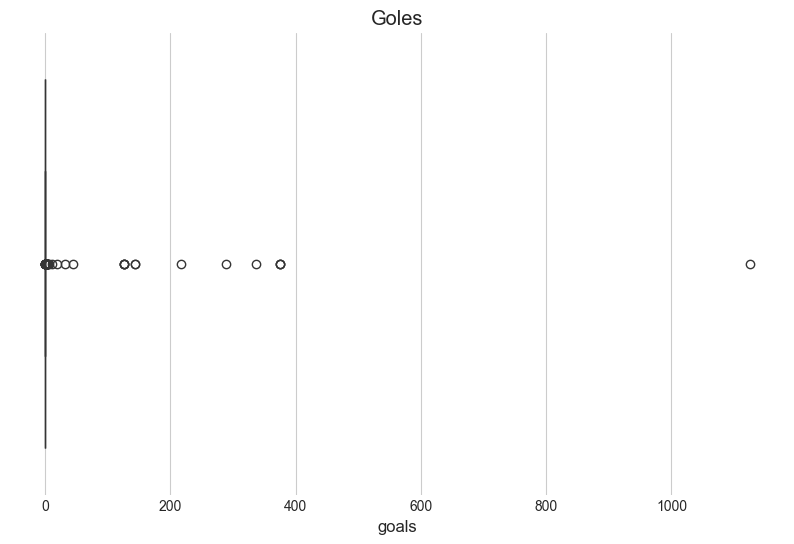

In [243]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_jugadores['goals'])
plt.title('Goles')
plt.xlabel('goals')
plt.show()

In [244]:
# Se empieza con la primer columna 'goals'
goles = 'goals'

# Se calculan los cuartiles y el IQR
Q1 = df_jugadores[goles].quantile(0.25)
Q3 = df_jugadores[goles].quantile(0.75)
IQR = Q3 - Q1

# Se definen los límites inferior y superior
lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

# Se detectan los outliers
outliers_goles = df_jugadores[(df_jugadores[goles] < lim_inferior) | (df_jugadores[goles] > lim_superior)]

print(f'Outliers detected:\n{outliers_goles}')

Outliers detected:
                                        team                    position  \
name                                                                       
Marcus Rashford            Manchester United           Attack-LeftWinger   
Alejandro Garnacho         Manchester United           Attack-LeftWinger   
Gianluca Scamacca            West Ham United       Attack Centre-Forward   
Jamie Vardy                   Leicester City       Attack Centre-Forward   
Pablo Sarabia        Wolverhampton Wanderers          Attack-RightWinger   
...                                      ...                         ...   
Nestory Irankunda            Adelaide United          Attack-RightWinger   
Luka Jovanovic               Adelaide United       Attack Centre-Forward   
Nicolas Milanovic   Western Sydney Wanderers  midfield-AttackingMidfield   
Amor Layouni        Western Sydney Wanderers          Attack-RightWinger   
Nathanael Blair     Western Sydney Wanderers       Attack Centre-Forw

In [245]:
# Creamos una copia del DataFrame original df_jugadores
df_ajustado = df_jugadores.copy()

# Calculamos la media de la columna 'goals'
media_goles = df_ajustado[goles].mean()

# Reemplazamos los outliers por la media calculada
df_ajustado.loc[outliers_goles.index, goles] = media_goles


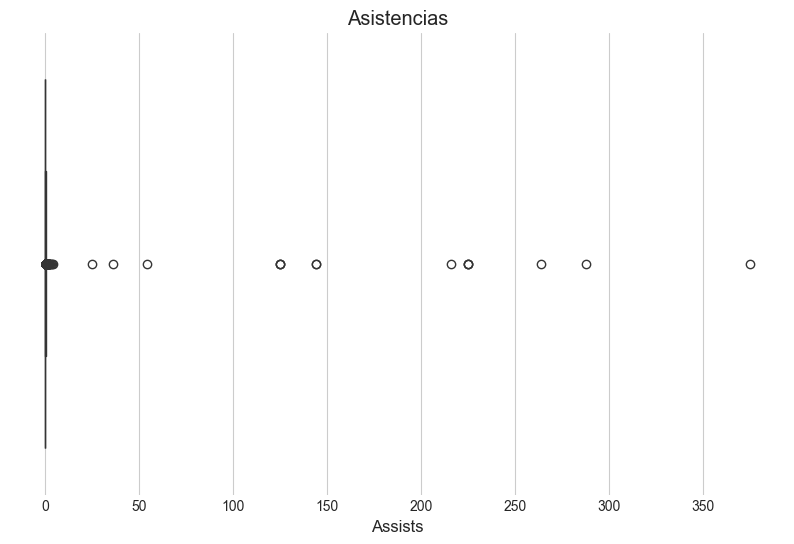

In [246]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_jugadores['assists'])
plt.title('Asistencias')
plt.xlabel('Assists')
plt.show()

In [247]:
asistencias = 'assists'

Q1 = df_jugadores[asistencias].quantile(0.25)
Q3 = df_jugadores[asistencias].quantile(0.75)
IQR = Q3 - Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

outliers_asistencias = df_jugadores[(df_jugadores[asistencias] < lim_inferior) | (df_jugadores[asistencias] > lim_superior)]

media_asistencias = df_ajustado[asistencias].mean()

df_ajustado.loc[outliers_asistencias.index, asistencias] = media_asistencias

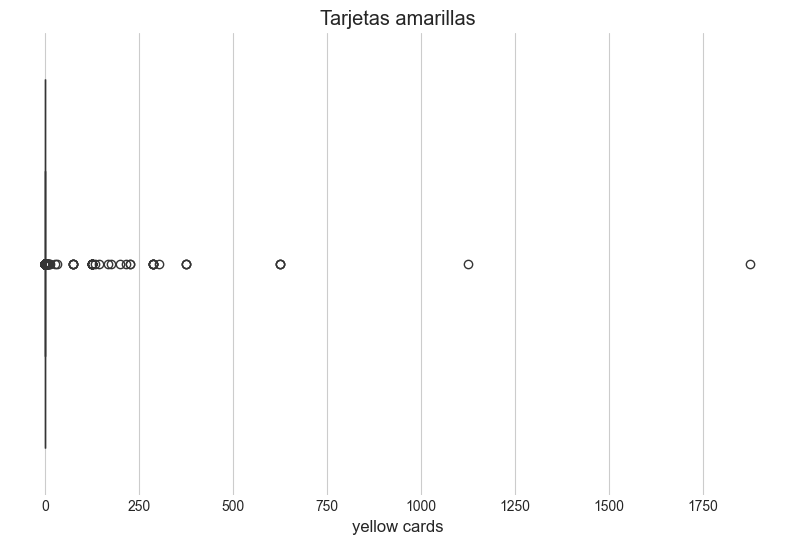

In [248]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_jugadores['yellow cards'])
plt.title('Tarjetas amarillas')
plt.xlabel('yellow cards')
plt.show()

In [249]:
amarillas = 'yellow cards'

Q1 = df_jugadores[amarillas].quantile(0.25)
Q3 = df_jugadores[amarillas].quantile(0.75)
IQR = Q3 - Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

outliers_amarillas = df_jugadores[(df_jugadores[amarillas] < lim_inferior) | (df_jugadores[amarillas] > lim_superior)]

media_amarillas = df_ajustado[amarillas].mean()

df_ajustado.loc[outliers_amarillas.index, amarillas] = media_amarillas

In [250]:
seg_amarillas = 'second yellow cards'

Q1 = df_jugadores[seg_amarillas].quantile(0.25)
Q3 = df_jugadores[seg_amarillas].quantile(0.75)
IQR = Q3 - Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

outliers_seg_amarillas = df_jugadores[(df_jugadores[seg_amarillas] < lim_inferior) | (df_jugadores[seg_amarillas] > lim_superior)]

media_seg_amarillas = df_ajustado[seg_amarillas].mean()

df_ajustado.loc[outliers_seg_amarillas.index, seg_amarillas] = media_seg_amarillas

In [251]:
rojas = 'red cards'

Q1 = df_jugadores[rojas].quantile(0.25)
Q3 = df_jugadores[rojas].quantile(0.75)
IQR = Q3 - Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

outliers_rojas = df_jugadores[(df_jugadores[rojas] < lim_inferior) | (df_jugadores[rojas] > lim_superior)]

media_rojas = df_ajustado[rojas].mean()

df_ajustado.loc[outliers_seg_amarillas.index, rojas] = media_rojas

De esta manera se reemplazaron todos los outliers de las variables afectadas para mejorar el analisis.

### **6.2 Analisis y limpieza de valores nulos**

In [252]:
df_ajustado.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

Dado que el data set no tiene valores nulos, para poner en practica la limpieza de valores nulos, se procedera a eliminar algunos valores de la columna "yellow cards".

In [253]:
# Calculamos la media de tarjetas amarillas por posicion
media_yc = df_ajustado.groupby('position_encoded')['yellow cards'].mean()
print(media_yc)

position_encoded
1    0.066673
2    0.211304
3    0.236257
4    0.198339
Name: yellow cards, dtype: float64


In [254]:
indices_position_2 = df_ajustado[df_ajustado['position_encoded'] == 2].index

# Seleccionamos 10 filas al azar
random_indices = np.random.choice(indices_position_2, size=10, replace=False)

# Reemplazamos la seleccion por valores nulos
df_ajustado.loc[random_indices, 'yellow cards'] = np.nan

# Calculamos la media de tarjetas amarillas para la posicion 2
mean_yellow_cards_position_2 = df_ajustado[df_ajustado['position_encoded'] == 2]['yellow cards'].mean()

# Reemplazamos
df_ajustado['yellow cards'].fillna(mean_yellow_cards_position_2, inplace=True)

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\2798012790.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ajustado['yellow cards'].fillna(mean_yellow_cards_position_2, inplace=True)


De esta forma sustituimos los valores nulos por la media de cada position_encoded

# **7 Analisis exploratorio de datos (EDA)**

Se buscara mostrar los datos mas relevantes para observar cuestiones generales de rendimiento y estadisticas basicas, que ayuden ademas a responder a las hipotesis.

### **7.1 Distribución de Altura (height) y Edad (age)**

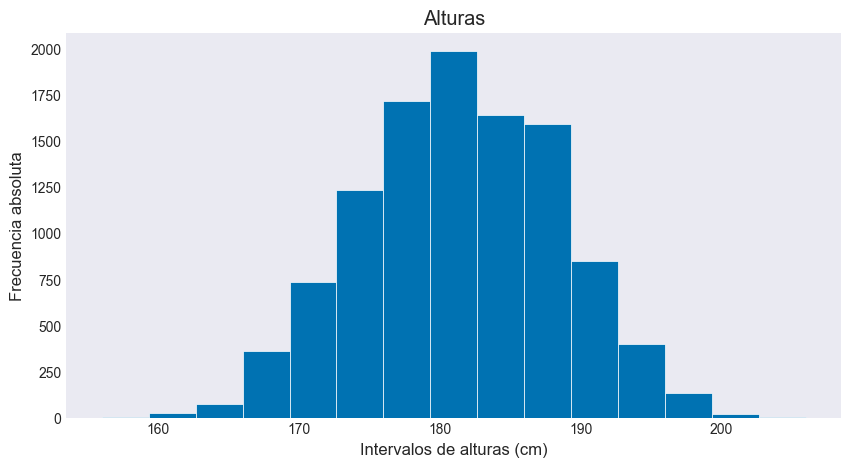

In [255]:
plt.style.use('seaborn-v0_8-dark')
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_jugadores.height,bins=15)
ax.set_title('Alturas')
ax.set_xlabel('Intervalos de alturas (cm)')
ax.set_ylabel('Frecuencia absoluta')
plt.show()

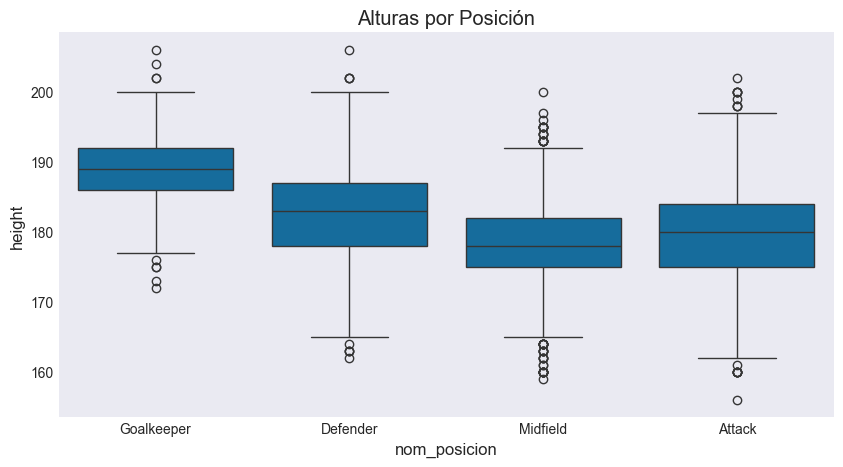

In [256]:
# Se le asigna nombre a cada posicion
posicion = {1:'Goalkeeper', 2:'Defender', 3:'Midfield', 4:'Attack'}

fig = plt.figure(figsize=(10, 5))
df_jugadores['nom_posicion'] = df_jugadores['position_encoded'].map(posicion)
sns.boxplot(data=df_jugadores, y='height', x='nom_posicion')
plt.title('Alturas por Posición')
plt.show()

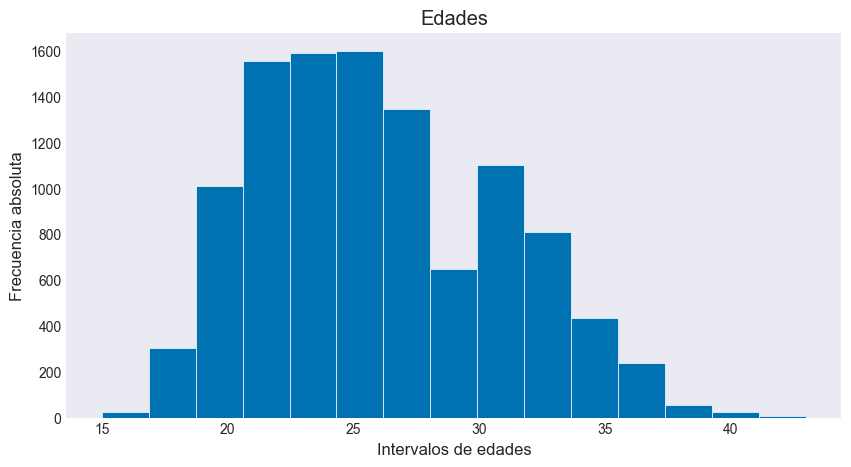

In [257]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_jugadores.age, bins=15)
ax.set_title('Edades')
ax.set_xlabel('Intervalos de edades')
ax.set_ylabel('Frecuencia absoluta')
plt.show()

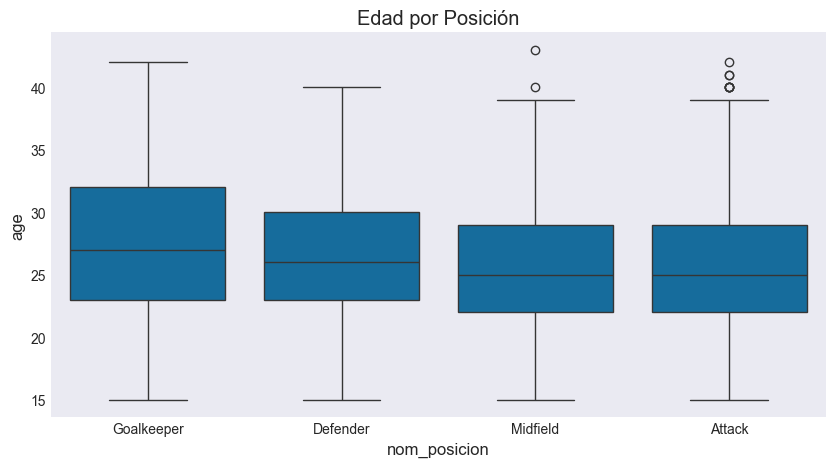

In [258]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=df_jugadores, y='age', x='nom_posicion')
plt.title('Edad por Posición')
plt.show()

### **7.2 Posiciones más jugadas (position)**

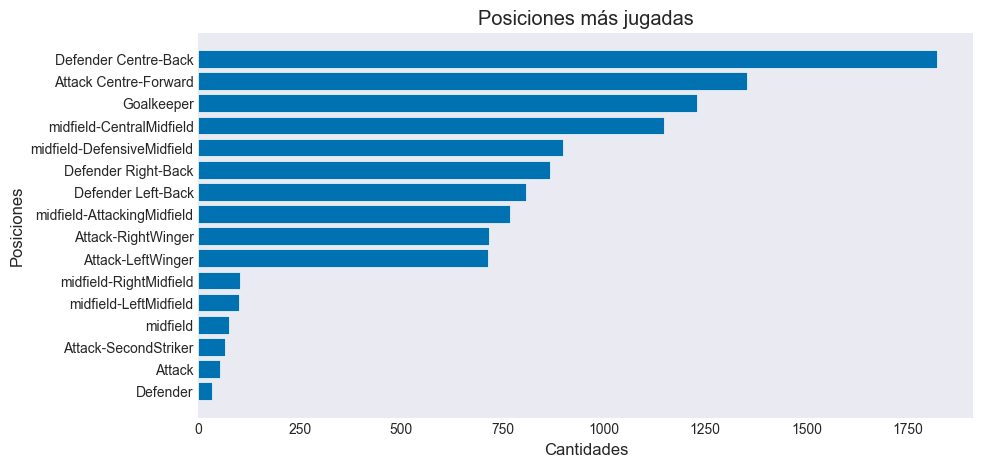

In [259]:
# Se cuenta la frecuencia de cada posición
posiciones = df_jugadores['position'].value_counts().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(posiciones.index, posiciones.values)
ax.set_title('Posiciones más jugadas')
ax.set_xlabel('Cantidades')
ax.set_ylabel('Posiciones')
plt.show()


### **7.3 Tiempo en el campo (minutes played)**

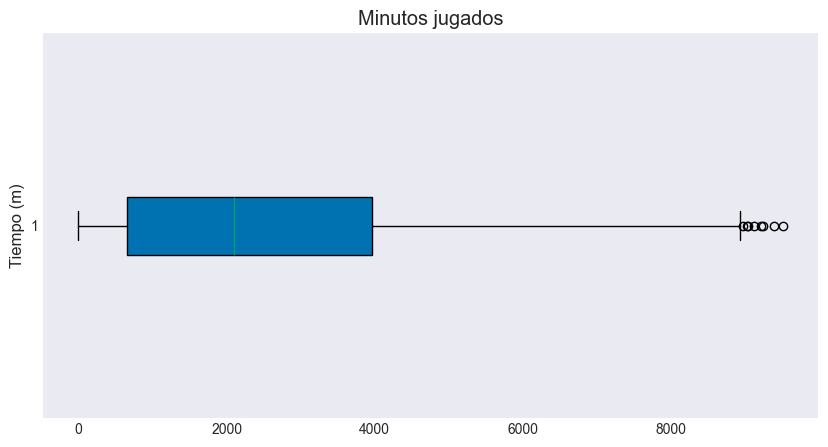

In [260]:
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(df_jugadores['minutes played'], vert=False, patch_artist= True)
ax.set_title('Minutos jugados')
ax.set_ylabel('Tiempo (m)')
plt.show()

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\3386808710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='minutes played', y='name', data=top_10_jugadores, palette='viridis')


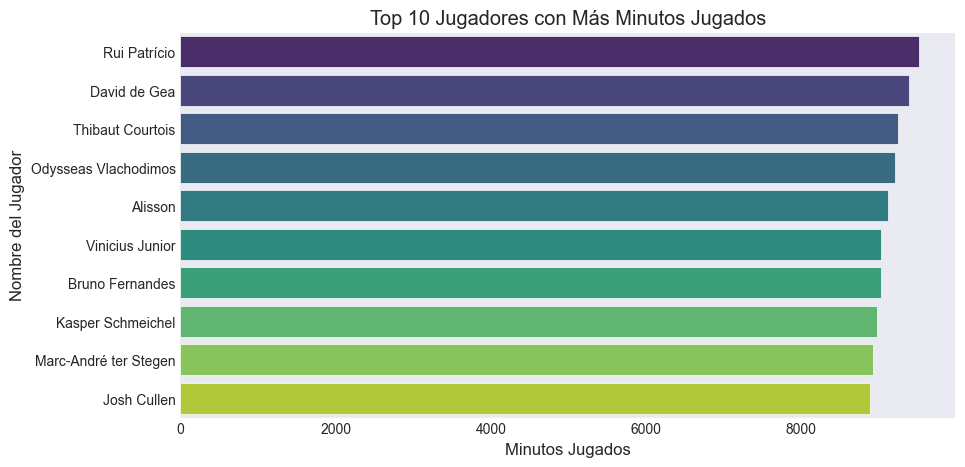

In [261]:
top_10_jugadores = df_jugadores.nlargest(10, 'minutes played')

plt.figure(figsize=(10, 5))
sns.barplot(x='minutes played', y='name', data=top_10_jugadores, palette='viridis')
plt.title('Top 10 Jugadores con Más Minutos Jugados')
plt.xlabel('Minutos Jugados')
plt.ylabel('Nombre del Jugador')
plt.show()


### **7.4 Rendimiento por tipo de jugador** 

**7.4.1 Goles (goals), asistencias (assists), tarjetas amarillas (yellow_cards) y rojas (red_cards).**

Para este apartado del EDA se utilizara el data frame modificado *df_ajustado*, creado en el apartado 6.

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\2439080406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nom_posicion', y='goals', data=df_ajustado, estimator=sum, errorbar=None, palette='Set1')


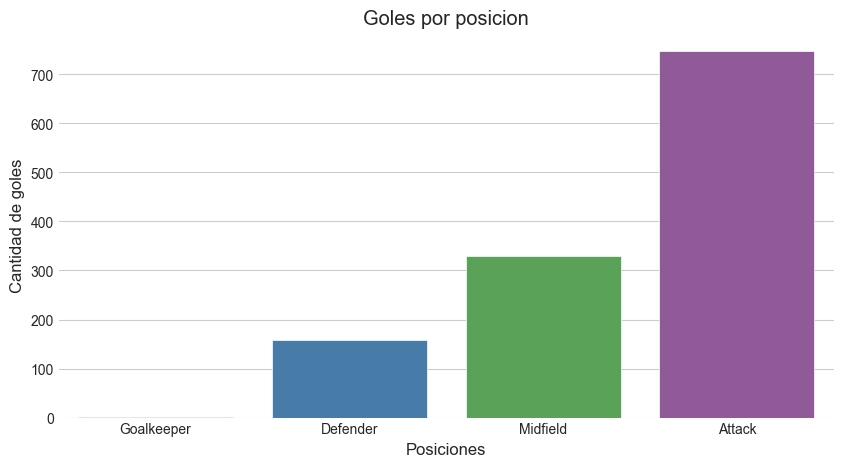

In [262]:
#Se crea diccionario para cambiar codigo de cada posicion por el nombre de la misma
posicion = {1:'Goalkeeper', 2:'Defender', 3:'Midfield', 4:'Attack'}

df_ajustado['nom_posicion'] = df_ajustado['position_encoded'].map(posicion)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='nom_posicion', y='goals', data=df_ajustado, estimator=sum, errorbar=None, palette='Set1')
plt.title('Goles por posicion')
plt.xlabel('Posiciones')
plt.ylabel('Cantidad de goles')
plt.show()

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\3086194161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='goals', y='name', data=top_goleadores, palette='viridis')


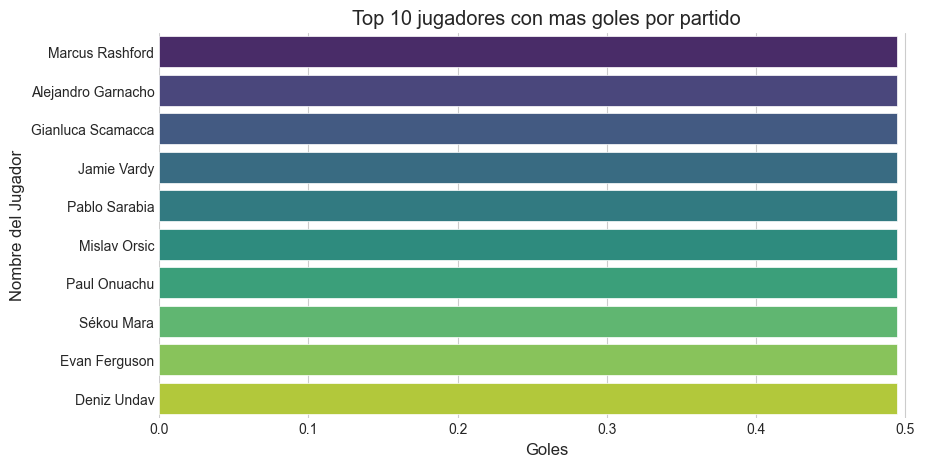

In [263]:
top_goleadores = df_ajustado[df_ajustado['position_encoded'] == 4].nlargest(10, 'goals')

plt.figure(figsize=(10, 5))
sns.barplot(x='goals', y='name', data=top_goleadores, palette='viridis')
plt.title('Top 10 jugadores con mas goles por partido')
plt.xlabel('Goles')
plt.ylabel('Nombre del Jugador')
plt.show()

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\2738316513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='assists', y='name', data=top_asistidores, palette='viridis')


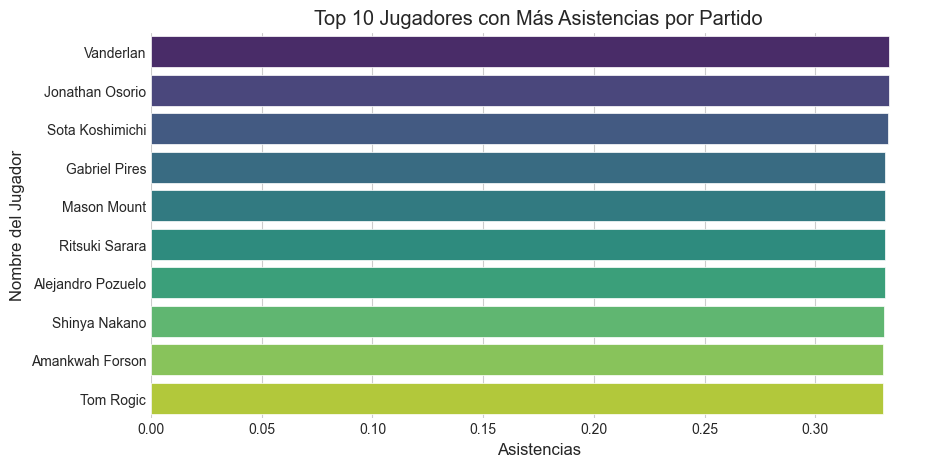

In [264]:
top_asistidores = df_ajustado[df_ajustado['position_encoded'].isin([2, 3])].nlargest(10, 'assists')

plt.figure(figsize=(10, 5))
sns.barplot(x='assists', y='name', data=top_asistidores, palette='viridis')
plt.title('Top 10 Jugadores con Más Asistencias por Partido')
plt.xlabel('Asistencias')
plt.ylabel('Nombre del Jugador')
plt.show()

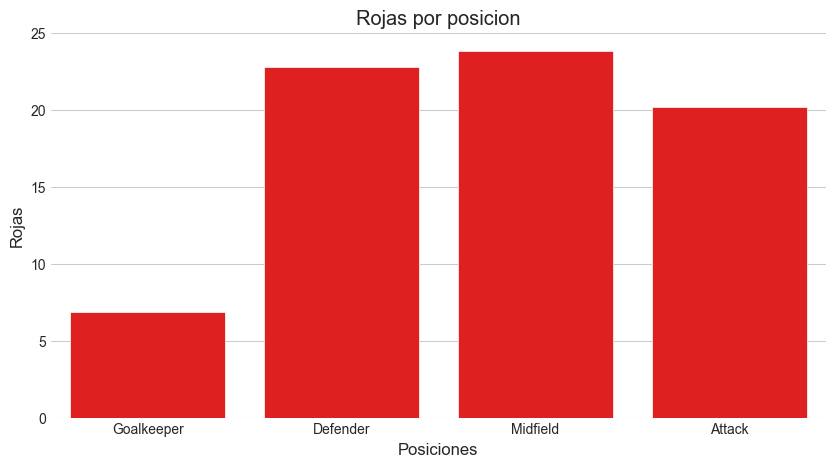

In [265]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='nom_posicion', y='red cards', data=df_ajustado, estimator=sum, errorbar=None, color='red')
plt.title('Rojas por posicion')
plt.xlabel('Posiciones')
plt.ylabel('Rojas')
plt.show()

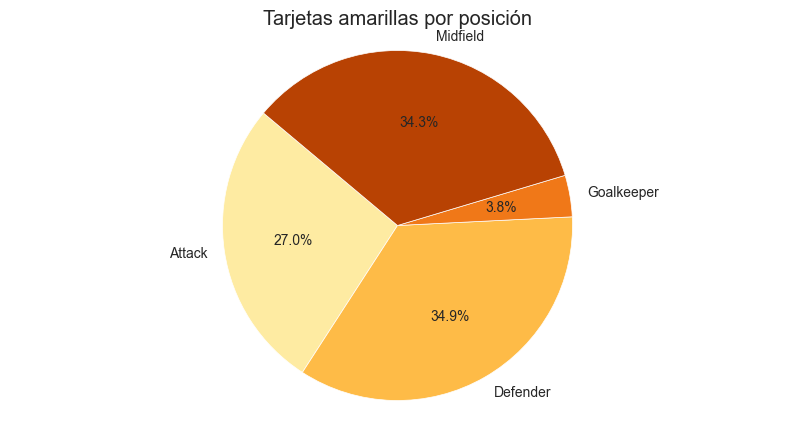

In [266]:
amarillas_por_posicion = df_ajustado.groupby('nom_posicion')['yellow cards'].sum().reset_index()
colors = sns.color_palette("YlOrBr", len(amarillas_por_posicion))
plt.figure(figsize=(10, 5))
plt.pie(amarillas_por_posicion['yellow cards'], labels=amarillas_por_posicion['nom_posicion'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tarjetas amarillas por posición')
plt.axis('equal')
plt.show()

### **7.5 Jugadores mas valiosos**

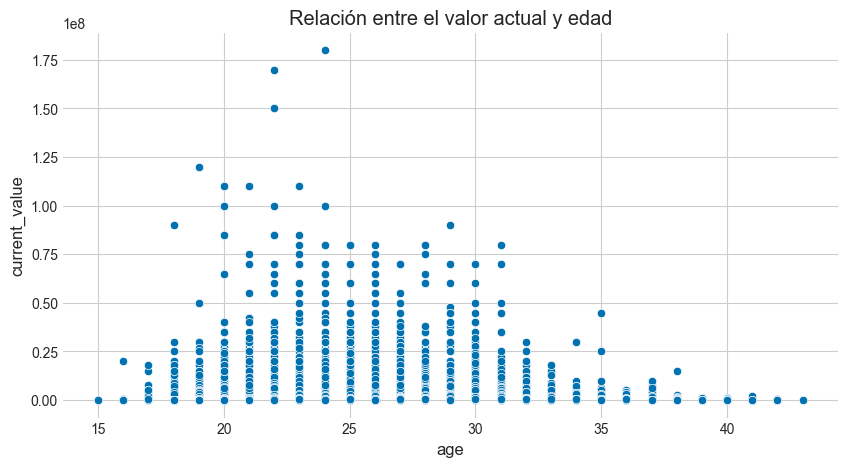

In [267]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ajustado, x='age', y='current_value')

plt.title('Relación entre el valor actual y edad')
plt.show()

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\741302948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='current_value', y='name', data=top_valiosos, palette='rocket')


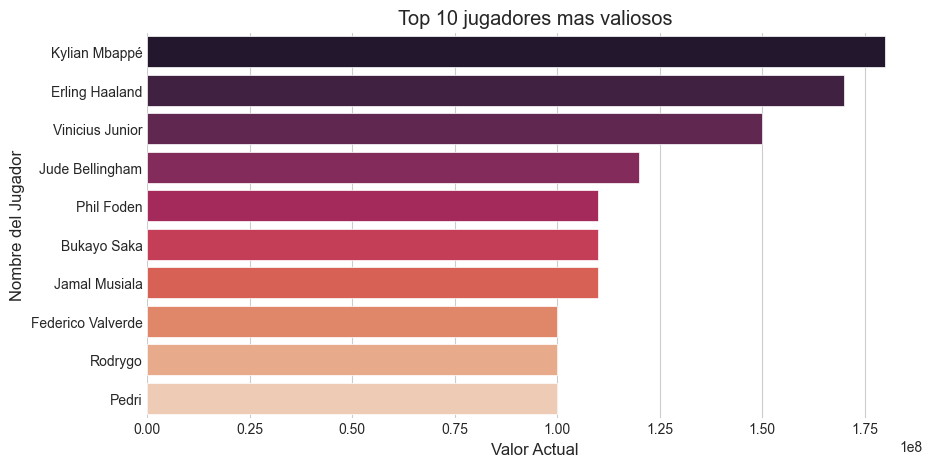

In [268]:
top_valiosos = df_ajustado.nlargest(10, 'current_value').sort_values(by='current_value', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='current_value', y='name', data=top_valiosos, palette='rocket')
plt.title('Top 10 jugadores mas valiosos')
plt.xlabel('Valor Actual')
plt.ylabel('Nombre del Jugador')
plt.show()


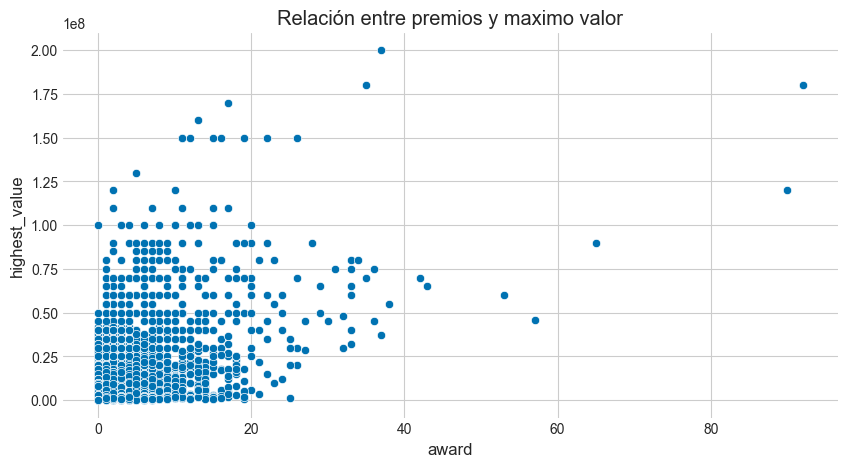

In [269]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ajustado, x='award', y='highest_value')

plt.title('Relación entre premios y maximo valor')
plt.show()

**7.5.1 Valor por tipo de jugador**


C:\Users\lican\AppData\Local\Temp\ipykernel_9672\4197404488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nom_posicion', y='current_value', data=df_ajustado, estimator=sum, errorbar=None, palette='Set1')


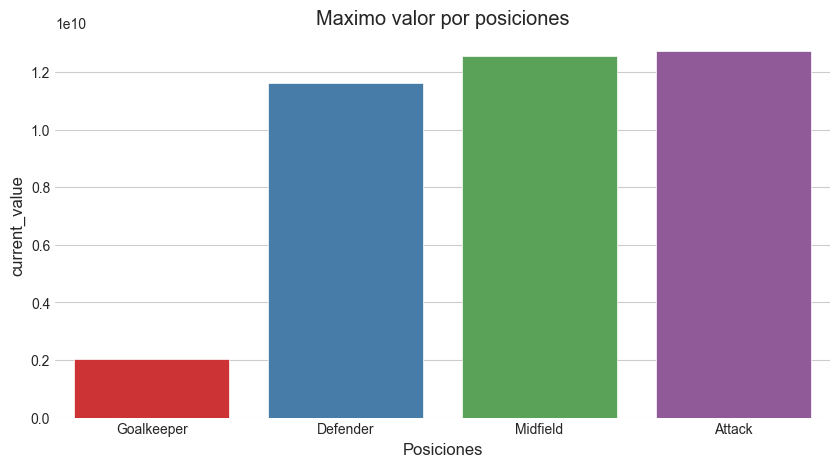

In [270]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='nom_posicion', y='current_value', data=df_ajustado, estimator=sum, errorbar=None, palette='Set1')
plt.title('Maximo valor por posiciones')
plt.xlabel('Posiciones')
plt.ylabel('current_value')
plt.show()

### **7.6 Equipos**

C:\Users\lican\AppData\Local\Temp\ipykernel_9672\1298340742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20 ,x='current_value',y='team',palette='cool')


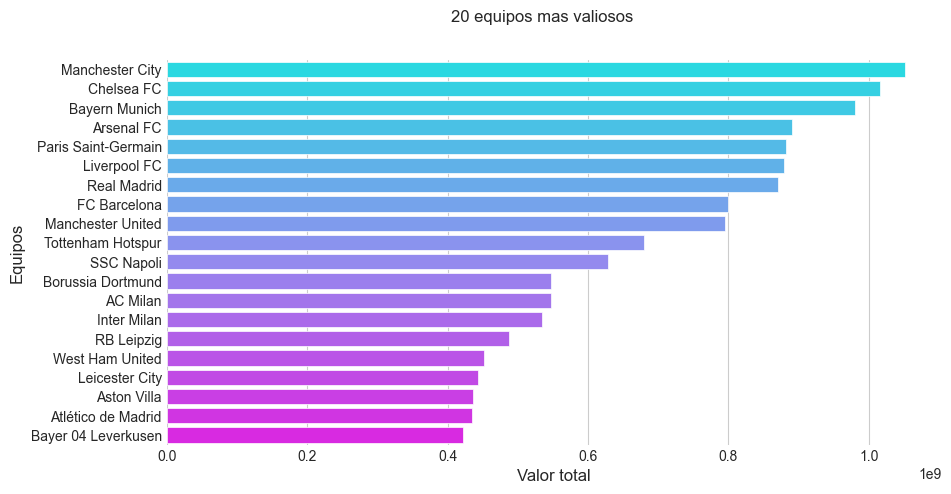

In [271]:
team = df_ajustado.groupby("team")
top20 = team.sum().sort_values(by="current_value", ascending=False).head(20)
fig=plt.figure(figsize=(10,5))

sns.barplot(data=top20 ,x='current_value',y='team',palette='cool')

fig.suptitle('20 equipos mas valiosos')
plt.xlabel('Valor total')
plt.ylabel('Equipos')
plt.show()

### **7.7 Correlacion**

Podemos inferir que las variables que mayor influencia positiva tendran en el valor actual de un jugador son la cantidad de minutos jugados, la cantidad de goles, los premios que obtuvo, etc., y por el contrario las tarjetas amarillas, las rojas y las lesiones deberian disminuir el valor.

In [272]:
# Se excluye a los arqueros 
playerDF=df_ajustado[(df_ajustado["nom_posicion"]!=1)]

# Se sacan las columnas con datos correspondientes a arqueros, la de equipo y posiciones
playerDF.drop(labels=["goals conceded","clean sheets","team","position","position_encoded","nom_posicion"],axis=1,inplace=True)
playerDF.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value', 'winger'],
      dtype='object')

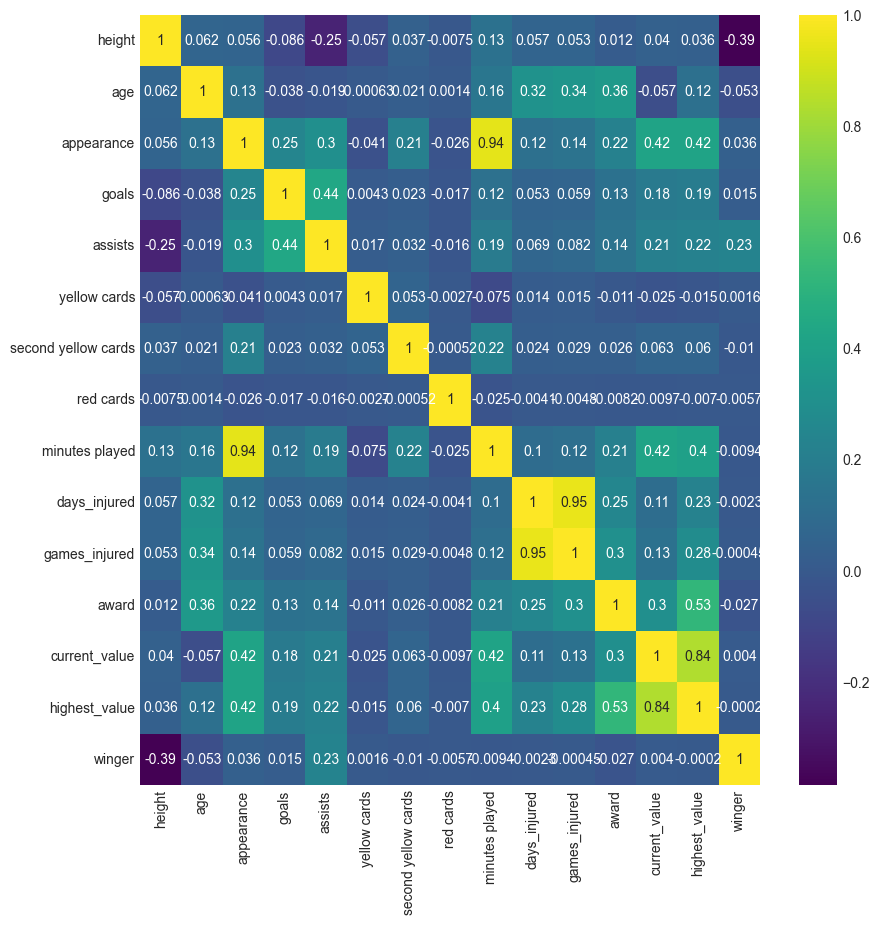

In [273]:
# Se selecciona solo los valores actuales y maximos mayores a 0
nuevo_PlayerDF=playerDF[(playerDF["current_value"]>0) & (playerDF["highest_value"]>0)]

cor=nuevo_PlayerDF.corr()

plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap="viridis")
plt.show()

# **8 Conclusiones del Analisis exploratorio de datos**

* No se utilizaran todas las variables del dataset, solo se utilizaran aquellas que tengan una correlacion significativa para calcular nuestra variable objetivo *current_value*
* La variable minutos jugados es una de las mas relevantes para el analisis, ya que la misma se utilizo para calcular otras variable promedio por partido
* Las variables goles, tarjetas amarillas y rojas no resultaron ser tan relevantes como se esperaba para el analisis en cuestion.
* Los jugadores entre 20 y 25 años son los que tienen el mayor valor actual

# **9 Feature selection**

En funcion del EDA y del modelo de correlacion realizado con anterioridad, se utilizaran las siguientes variables para entrenar el modelo:

* highest_value
* minutes played
* appearance
* award

In [274]:
Players_features = ['highest_value','minutes played','appearance','award']

# **10 Deficion y entrenamiento del modelo de aprendizaje supervisado: Regresion lineal**

In [275]:
# Definimos las variables
# Feature/variable independiente
x = nuevo_PlayerDF[Players_features]

#Target/variable dependiente (Variable a predecir)
y = nuevo_PlayerDF['current_value']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=35)

# Entrenamos el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [277]:
y_pred = regressor.predict(X_test)
y_pred.round(0)

array([ 1103388., 11101747.,    24165., ...,  1234378.,  3107001.,
        2137194.])

In [278]:
y_test

name
Jere Uronen         1000000
Yusuf Yazici        9000000
Ethan Zubak          300000
Xherdan Shaqiri     4000000
Mads Roerslev       2200000
                     ...   
Douglas Costa       2000000
Takumi Kamijima      600000
Claudio Corvalán     300000
Kal Naismith         900000
Eden Karzev         2300000
Name: current_value, Length: 3177, dtype: int64

# **11 Evaluacion y validacion del modelo**

In [279]:
# Obtenemos el puntaje del modelo de testeo
regressor.score(X_test, y_test)

0.7053265239924753

In [280]:
#obtenemos el puntaje del modelo de prueba
regressor.score(X_train, y_train)

0.7485325228334712

In [281]:
# Se crea una funcion para resumir las principales metricas para algoritmos de regresion
def printResult(model_name,y_pred):
    print(f"Model Name : {model_name} ")
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score:',(r2_score(y_test, y_pred)))

printResult('LinearRegression',y_pred)

Model Name : LinearRegression 
Mean Absolute Error (MAE): 2205244.2400287474
Mean Squared Error (MSE): 24536236087093.62
Root Mean Squared Error (RMSE): 4953406.513410102
R2 Score: 0.7053265239924753


In [282]:
# Función para ingresar datos y predecir el valor de y
def predict_player_value():
    highest_value = float(input("Ingrese el valor más alto del jugador: "))
    minutes_played = float(input("Ingrese los minutos jugados: "))
    appearance = float(input("Ingrese el número de apariciones: "))
    award = float(input("Ingrese el número de premios: "))
    
    input_data = np.array([[highest_value, minutes_played, appearance, award]])
    
    # Realizar la predicción
    predicted_value = regressor.predict(input_data)
    predicted_value_int = int(predicted_value[0])
    
    print(f"El valor actual predicho del jugador es: {predicted_value_int}")

predict_player_value()

# Para probar, se toman e ingresan los valores del jugador Lionel Messi

El valor actual predicho del jugador es: 69518229


c:\Users\lican\OneDrive\Documentos\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **12 Conclusiones finales**

* En funcion de las principales metricas para evaluar el algoritmo de regresion, se concluye que el modelo podria funcionar bien para predecir la variable objetivo (todo depende de los intervalos de aprobacion definidos).
* Aproximadamente un 70,5% del valor de la variable objetivo se puede explicar proporcionando informacion sobre las variables independientes.
* A pesar del trabajo sobre los outliers, se sigue observando por los valores de las medidas de error del modelo (MAE y MSE) que aun se podria seguir trabajando sobre los mismos para aumentar la eficacia del modelo.
* Sin duda el calculo que se realizo para "adecuar" ciertas variables a un valor promedio por partido generaron mayor presencia de valores atipicos que contribuyeron a dificultar el analisis del dataset y el resultado final del modelo de regresion.
* Seria apropiado explorar otros modelos mas complejos para capturar mejor las relaciones no lineales.